In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from IPython.display import Image
import os

In [2]:
liste=['A'+str(i) for i in range(10)]

In [3]:
liste

['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']

In [4]:
url_train='C:\\Users\\saf167687\\Desktop\\Python_Learning\\Machine Learning Python\\98-Training\\archive\\Sign-Language-Digits-Datase\\train\\'
url_val='C:\\Users\\saf167687\\Desktop\\Python_Learning\\Machine Learning Python\\98-Training\\archive\\Sign-Language-Digits-Datase\\valid\\'

In [8]:
train_dir=os.listdir(url_train)
train_dir

['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']

In [9]:
val_dir=os.listdir(url_val)
val_dir

['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']

In [10]:
len(os.listdir(url_train+train_dir[0]))

170

In [11]:
len_train_samples=[]
## train folder
train=[]
for folder in train_dir:
    for image in os.listdir(url_train+folder):
        train.append(url_train+folder+'\\'+image)
        
    len_train_samples.append(len(os.listdir(url_train+folder)))
    
## Valid folder
val=[]
len_val_samples=[]
for folder in val_dir:
    for image in os.listdir(url_val+folder):
        val.append(url_val+folder+'\\'+image)   
    len_val_samples.append(len(os.listdir(url_val+folder)))

In [12]:
len_train_samples

[170, 171, 171, 171, 172, 172, 172, 171, 173, 169]

In [13]:
len_val_samples

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30]

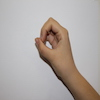

In [14]:
Image(train[0])

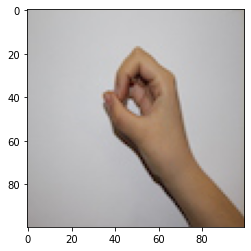

In [15]:
plt.imshow(imread(train[0]))

In [111]:
# Define image size
IMG_SIZE =100

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (100, 100)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [115]:
X_train=np.array([process_image(image_path) for image_path in train])

X_val=np.array([process_image(image_path) for image_path in val])

In [116]:
X_train.shape,X_val.shape

((1712, 100, 100, 3), (300, 100, 100, 3))

In [109]:
X_train[0].shape

(100, 100, 3)

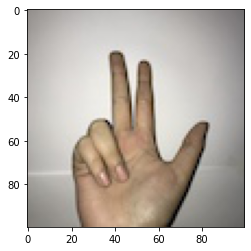

In [152]:
plt.imshow(X_train[600])

In [118]:
from tensorflow.keras.utils import to_categorical

In [119]:
# we need to know in each folder how many samples we have

In [120]:
len_train_samples,len_val_samples

([170, 171, 171, 171, 172, 172, 172, 171, 173, 169],
 [30, 30, 30, 30, 30, 30, 30, 30, 30, 30])

In [127]:
y_train=[]
for i,j in enumerate(len_train_samples):
    y_train=y_train+[i]*j
    
y_val=[]
for i,j in enumerate(len_val_samples):
    y_val=y_val+[i]*j

In [132]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [129]:
y_train=np.array(y_train)
y_val=np.array(y_val)

In [131]:
y_train=to_categorical(y_train,10)
y_val=to_categorical(y_val,10)

In [124]:
y_train.shape,y_val.shape

((1712, 10), (300, 10))

In [133]:
X_train=tf.constant(X_train)
X_val=tf.constant(X_val)

y_train=tf.constant(y_train)
y_val=tf.constant(y_val)

In [134]:
len(X_train),len(y_train), len(X_val), len(y_val)

(1712, 1712, 300, 300)

In [135]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

(TensorShape([1712, 100, 100, 3]),
 TensorShape([1712, 10]),
 TensorShape([300, 100, 100, 3]),
 TensorShape([300, 10]))

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [137]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=100, kernel_size=(4,4),input_shape=(100, 100, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 100 by 100 to 10000 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [138]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 97, 97, 100)       4900      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 100)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 230400)            0         
                                                                 
 dense (Dense)               (None, 128)               29491328  
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 29,497,518
Trainable params: 29,497,518
Non-trainable params: 0
____________________________________________

In [139]:
from tensorflow.keras.callbacks import EarlyStopping

In [140]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [141]:
model.fit(X_train,y_train,epochs=40,validation_data=(X_val,y_val),callbacks=[early_stop])

Epoch 1/40
54/54 [==============================] - 31s 564ms/step - loss: 3.2933 - accuracy: 0.2459 - val_loss: 1.6518 - val_accuracy: 0.4333
Epoch 2/40
54/54 [==============================] - 30s 559ms/step - loss: 1.1250 - accuracy: 0.6700 - val_loss: 0.9333 - val_accuracy: 0.7067
Epoch 3/40
54/54 [==============================] - 30s 563ms/step - loss: 0.6375 - accuracy: 0.8102 - val_loss: 0.7290 - val_accuracy: 0.7700
Epoch 4/40
54/54 [==============================] - 31s 572ms/step - loss: 0.4029 - accuracy: 0.8832 - val_loss: 0.6327 - val_accuracy: 0.7800
Epoch 5/40
54/54 [==============================] - 31s 573ms/step - loss: 0.2689 - accuracy: 0.9393 - val_loss: 0.5078 - val_accuracy: 0.8500
Epoch 6/40
54/54 [==============================] - 34s 628ms/step - loss: 0.1685 - accuracy: 0.9667 - val_loss: 0.5029 - val_accuracy: 0.8400
Epoch 7/40
54/54 [==============================] - 34s 640ms/step - loss: 0.1218 - accuracy: 0.9725 - val_loss: 0.5196 - val_accuracy: 0.8267

In [142]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,3.293347,0.245911,1.651758,0.433333
1,1.124979,0.669977,0.933335,0.706667
2,0.637461,0.810164,0.728960,0.770000
3,0.402879,0.883178,0.632692,0.780000
4,0.268868,0.939252,0.507840,0.850000


<AxesSubplot:>

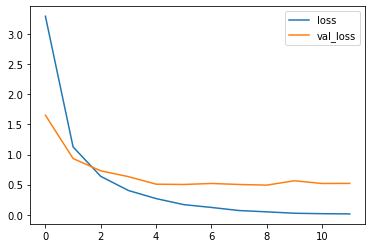

In [143]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

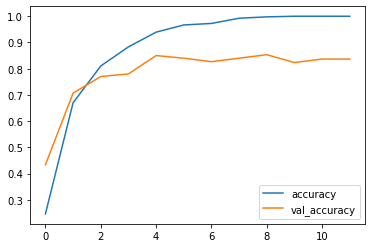

In [144]:
losses[['accuracy','val_accuracy']].plot()

In [81]:
### Test the model on test samples

In [149]:
url_test='C:\\Users\\saf167687\\Desktop\\Python_Learning\\Machine Learning Python\\98-Training\\archive\\Sign-Language-Digits-Datase\\test\\'
test_dir=os.listdir(url_test)
len_test_samples=[]
## train folder
test=[]
for folder in test_dir:
    for image in os.listdir(url_test+folder):
        test.append(url_test+folder+'\\'+image)
        
    len_test_samples.append(len(os.listdir(url_test+folder)))

In [151]:
X_test=np.array([process_image(image_path) for image_path in test])

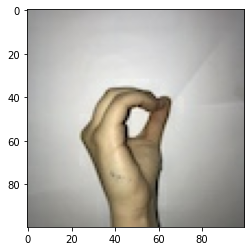

In [152]:
plt.imshow(X_test[1])

In [153]:
X_test=tf.constant(X_test)


In [154]:
predictions=model.predict(X_test)

In [155]:
predictions

array([[9.99999762e-01, 1.03407011e-07, 3.54819951e-09, 1.02004229e-07,
        8.28740521e-10, 9.18645693e-13, 5.08505327e-09, 6.78622269e-10,
        2.61735023e-10, 1.49373527e-10],
       [1.76050171e-01, 6.91410542e-01, 3.69126629e-03, 6.91440146e-05,
        9.34955491e-09, 8.36652134e-07, 5.84231384e-06, 2.14270712e-03,
        1.26561522e-01, 6.79588484e-05],
       [9.98329580e-01, 1.04614650e-03, 9.04797271e-05, 4.75560591e-06,
        1.16728049e-09, 3.36275674e-09, 5.12766337e-06, 8.56376064e-05,
        4.35181224e-04, 3.07765004e-06],
       [9.99986529e-01, 6.59291430e-08, 1.58279889e-10, 9.99138408e-08,
        5.34856611e-07, 3.48846152e-06, 1.84113755e-08, 9.91176421e-07,
        8.33224658e-06, 9.05453135e-09],
       [8.19948494e-01, 6.42976314e-02, 5.45914110e-04, 2.75992661e-05,
        7.04896877e-07, 3.85471850e-07, 5.66628046e-07, 3.44626000e-03,
        1.09756760e-01, 1.97564415e-03],
       [3.65854285e-05, 6.44221008e-02, 4.57295291e-02, 5.55567327e-04,
   

In [161]:
predictions>0.5

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False,  True,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, 

In [162]:
((predictions>0.5).astype('int')).shape

(50, 10)

In [168]:
y_preds=np.argmax((predictions>0.5).astype('int'), axis=1)

In [169]:
y_preds

array([0, 1, 0, 0, 0, 8, 1, 1, 1, 0, 2, 2, 2, 2, 6, 9, 3, 3, 3, 3, 0, 4,
       4, 4, 4, 5, 5, 5, 5, 4, 4, 6, 6, 6, 6, 0, 7, 7, 2, 7, 0, 8, 8, 6,
       8, 9, 5, 9, 9, 9], dtype=int64)

In [174]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

In [173]:
len(y_test), len(y_preds)

(50, 50)

In [170]:
y_test=[]
for i,j in enumerate(len_test_samples):
    y_test=y_test+[i]*j

In [172]:
y_test=np.array(y_test)

In [175]:
from sklearn.metrics import classification_report,confusion_matrix


In [176]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5
           3       1.00      0.80      0.89         5
           4       0.67      0.80      0.73         5
           5       0.80      0.80      0.80         5
           6       0.67      0.80      0.73         5
           7       1.00      0.60      0.75         5
           8       0.75      0.60      0.67         5
           9       0.80      0.80      0.80         5

    accuracy                           0.74        50
   macro avg       0.77      0.74      0.74        50
weighted avg       0.77      0.74      0.74        50



In [178]:
confusion_matrix(y_test,y_preds)

array([[4, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 3, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 4, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 4, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 3, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 3, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 4]], dtype=int64)

In [104]:
## Save the model

In [179]:
from tensorflow.keras.models import load_model
model.save('sign_langauge_prediction.h5')
